<IPython.core.display.Javascript object>


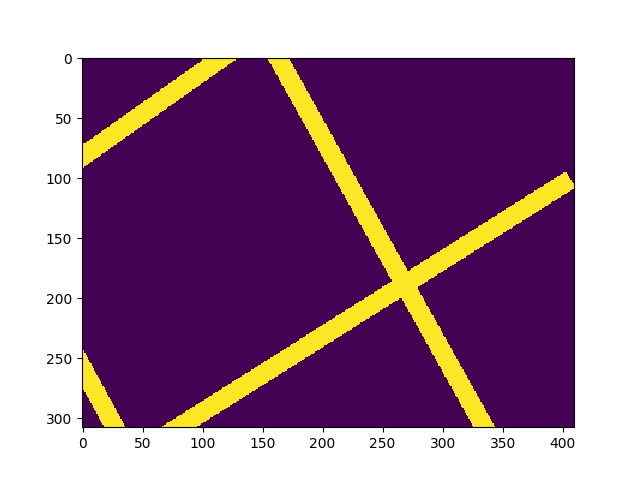

In [1]:
%matplotlib notebook

import cv2
import numpy as np
import matplotlib.pyplot as plt
import py_grid_finder as gr
from math import cos, sin

video = cv2.VideoCapture("../Video/hard.mp4")
# for i in range(320):
for i in range(120):
    result, image = video.read()

result, image = cv2.VideoCapture("../Images/TestWorstCase.png").read()

assert(result)
# image = cv2.flip(image, 0)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

lower_red1 = np.array([0, 30, 0])
upper_red1 = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([170, 30, 0])
upper_red2 = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask = mask1 | mask2
plt.imshow(mask)
plt.show()


(204, 73)
1.064650843716541
14
(204, 73)
4.1887902047863905
14
(242, 206)
2.600540585471551
16
(126, 0)
0.0
0


<IPython.core.display.Javascript object>


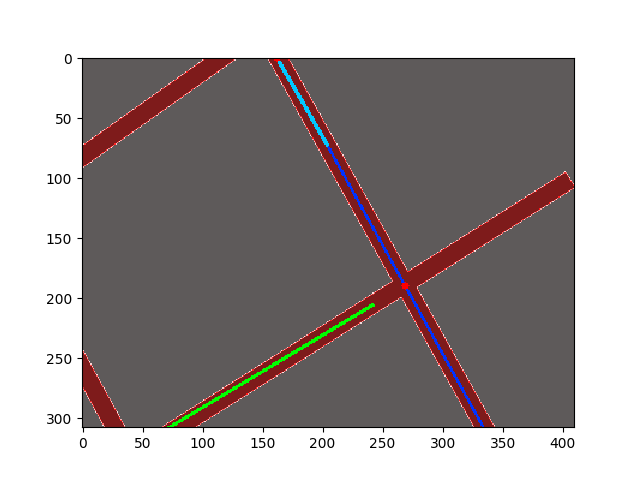

In [3]:
gf = gr.GridFinder(np.array(mask))
firstLines = gf.getFirstLines()

def showLine(line, color, image=image):
    print(line.getLineCenter())
    print(line.getAngle())
    print(line.getWidth())
    p1 = (line.getLineCenter().x, line.getLineCenter().y)
    p2 = (line.getLineCenter().x + int(2 * 410 * cos(line.getAngle())), 
          line.getLineCenter().y + int(2 * 410 * sin(line.getAngle())))
    cv2.line(image, p1, p2, color, 2)

secondLine = gf.findNextLine(firstLines[0])
thirdLine = gf.findNextLine(firstLines[1])

showLine(firstLines[0], (0, 50, 255))
showLine(firstLines[1], (0, 200, 255))
showLine(secondLine, (0, 255, 0))
showLine(thirdLine, (255, 255, 0))

intersections = (gr.intersect(firstLines[0], secondLine),
                 gr.intersect(firstLines[1], thirdLine))
for intersect in intersections:
    cv2.circle(image, intersect, 3, (255, 0, 0), -1)

plt.figure()
plt.imshow(image)
plt.show()